In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set the paths
datapth = os.path.join('..', 'test-swr', 'swr013')

In [2]:
hobj = flopy.utils.HeadFile(os.path.join(datapth, 'condchk1D.hds'))
times = hobj.get_times()

In [3]:
sobj = flopy.utils.SwrExchange(os.path.join(datapth, 'condchk1D.qaq'))
print(sobj.get_record_names())
print(sobj.get_nrecords())

('totim', 'reach', 'layer', 'bottom', 'stage', 'depth', 'head', 'wetper', 'cond', 'headdiff', 'exchange')
(5, 0)


In [4]:
top = np.array([10., 5., 0.])

In [5]:
def wp(z, rb, w, s, h):
    if isinstance(s, float):
        s = np.array([s])
    elif isinstance(s, list):
        s = np.array(s)
    e = s.copy()
    idx = s < h
    e[idx] = h[idx]
    idx = e > z
    e[idx] = z
    d = e - rb
    return w + 2. * d

In [6]:
hts = hobj.get_ts(idx=[(0,0,1)])
ts = sobj.get_ts(irec=1)
print(ts.dtype.names)
print(hts.dtype)

('totim', 'reach', 'layer', 'bottom', 'stage', 'depth', 'head', 'wetper', 'cond', 'headdiff', 'exchange')
float32


(-1, 11)

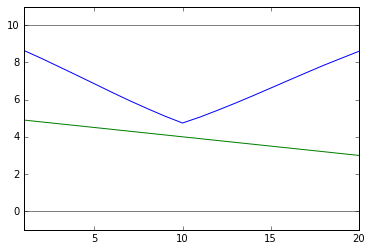

In [7]:
plt.plot(hts[:,0], hts[:,1])
plt.plot(ts['totim'], ts['stage'])
plt.plot([1,20], [0,0], color='0.5')
plt.plot([1,20], [top[0],top[0]], color='0.5')
plt.xlim(1, 20)
plt.ylim(-1, 11)

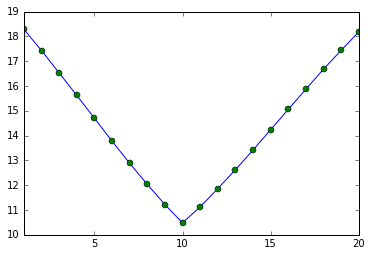

In [8]:
plt.xlim(1, 20)
plt.plot(ts['totim'], ts['wetper'])
cw = wp(top[0], 0., 1., ts['stage'], hts[:,1])
plt.plot(ts['totim'], cw, lw=0, marker='o')

In [9]:
hts = hobj.get_ts(idx=[(0,0,2)])
ts = sobj.get_ts(irec=2)

(-1, 11)

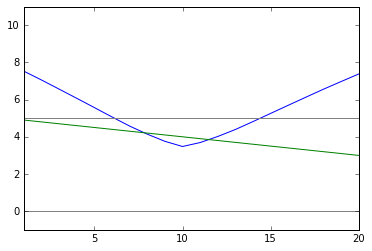

In [10]:
plt.plot(hts[:,0], hts[:,1])
plt.plot(ts['totim'], ts['stage'])
plt.plot([1,20], [0,0], color='0.5')
plt.plot([1,20], [top[1],top[1]], color='0.5')
plt.xlim(1, 20)
plt.ylim(-1, 11)

(8, 12)

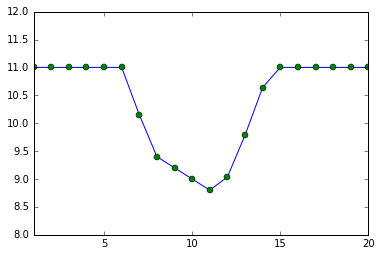

In [11]:
plt.xlim(1, 20)

plt.plot(ts['totim'], ts['wetper'])
cw = wp(top[1], 0., 1., ts['stage'], hts[:,1])
plt.plot(ts['totim'], cw, lw=0, marker='o')
plt.ylim(8, 12)

In [12]:
hts = hobj.get_ts(idx=[(0,0,3)])
ts = sobj.get_ts(irec=3)

(-1, 11)

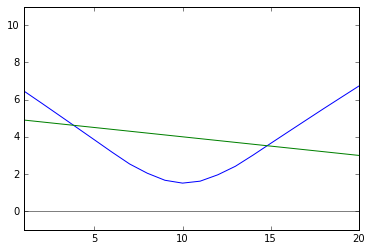

In [13]:
plt.plot(hts[:,0], hts[:,1])
plt.plot(ts['totim'], ts['stage'])
plt.plot([1,20], [0,0], color='0.5')
plt.plot([1,20], [top[2],top[2]], color='0.5')
plt.xlim(1, 20)
plt.ylim(-1, 11)

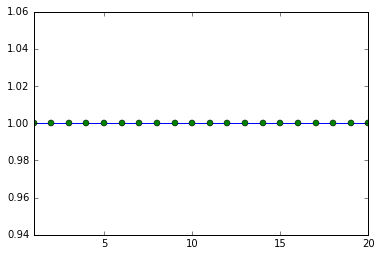

In [14]:
plt.xlim(1, 20)

plt.plot(ts['totim'], ts['wetper'])
cw = wp(top[2], 0., 1., ts['stage'], hts[:,1])
plt.plot(ts['totim'], cw, lw=0, marker='o')